# <center>온라인 서비스 기업의 매출을 올리기 위한 로그데이터 분석 - 지그재그

다양한 기업의 실제 로그데이터를 활용하여 매출 증대에 기여할 수 있는 방법에 대해 데이터 분석을 통해 얻은 결과를 바탕으로 의견까지 도출해
보겠습니다.

■ 온라인 서비스 기업의 매출 증대에 필요한 기본생각
- 서비스를 제공하는 싸이트로 많은 고객을 유입시킨다
- 유입된 고객이 최대한 많은 상품 및 서비스를 구매한다.
- 구매한 고객들의 구매력을 더욱 높인다.

이러한 기본생각을 토대로 주어진 데이터에서 얻을 수 있는 것들을 찾아보고 python을 통해 분석 및 시각화를 진행한 뒤 의견을 제시해보겠습니다.

---

## <center> 1. 지그재그기업 분석을 위한 패키지 및 데이터 불러오기
분석을 진행하기에 앞서 필요한 패키지(라이브러리)와 데이터를 불러오겠습니다.
 - 사용할 패키지 불러오기
 - 사용할 데이터 불러오기

### 1) 사용할 라이브러리 불러오기 & 한글폰트 설정
 - numpy : 수식계산을 도와주는 패키지
 - pandas : 데이터 분석을 위한 패키지 입니다.
 - seaborn : 시각화 패키지 입니다.(matplotlib 기반으로 만들어 졌으며 matplotlib보다 좀더 간편하게 사용하는데 용이합니다.)
 - matplotlib : 시각화 패키지 입니다.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from matplotlib import font_manager,rc

# 화면에 출력할 최대 컬럼 개수를 50개로 늘려줍니다.
pd.options.display.max_columns = 50

## 폰트 경로 지정
font_path = "C:/Windows/Fonts/H2GTRM.TTF"

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 폰트 지정하기
matplotlib.rc('font', family = font_name)

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

### 2) 데이터 불러오기

#### 가장먼저 유저데이터를 불러오겠습니다. 유저데이터에는 아래와 같은 정보가 담겨있습니다.
 - user_id : 사용자의 고유한 정보를 나타내는 아이디.
 - os : 사용자가 이용중인 OS 기기. 'iOS'는 아이폰, 'And'는 안드로이드를 나타냅니다.
 - age : 사용자가 입력한 연령.
   - 값이 -1일 경우 사용자가 연령 정보를 입력하지 않았다고 간주합니다.
   - 값이 45일 경우 45세 이상이라고 간주합니다.

In [2]:
# 판다스의 read_csv 기능을 이용하여 지그재그의 사용자 정보(user_info.csv)를 읽어옵니다.
# 이 결과를 user_info라는 이름의 변수에 할당합니다.
user_info = pd.read_csv("data/user_info.csv")

# user_info 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(user_info.shape)

# head()로 user_info 데이터의 상위 5개를 띄웁니다.
user_info.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


#### 다음으로 쇼핑몰 정보가 담겨있는 데이터를불러  오겠습니다. 쇼핑몰데이터에는 아래와 같은 정보가 담겨있습니다.

 - shop_id : 쇼핑몰의 고유함을 나타내는 아이디입니다.
 - name : 쇼핑몰의 이름입니다.
 - category : 쇼핑몰이 등록한 카테고리입니다. (ex: 의류, 가방, 슈즈, 액세서리, etc)
 - age : 쇼핑몰에서 등록한 연령대로써 이 쇼핑몰의 타겟 연령대입니다.
   - category 값이 '의류'인 경우에만 연령대가 등록되어 있습니다.
   - 표현 형식은 10대, 20대 초반, 30대 중반 등으로 되어있습니다.
   - 두 개 이상의 연령대를 표현할 경우 슬래시(```/```)를 사용합니다.
 - style : 쇼핑몰이 등록한 스타일정보 입니다.
   - category 값이 '의류', '빅사이즈', '커플룩', '액세서리'인 경우에만 스타일 값이 등록되어 있습니다.
   - 두 개 이상의 스타일을 표현할 경우 슬래시(```/```)를 사용합니다.

In [3]:
# 판다스의 read_csv 기능을 이용하여 지그재그의 쇼핑몰 정보(shop_info.csv)를 읽어옵니다.
# 이 결과를 shop_info라는 이름의 변수에 할당합니다.
shop_info = pd.read_csv("data/shop_info.csv")

# shop_info 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(shop_info.shape)

# head()로 shop_info 데이터의 상위 5개를 띄웁니다.
shop_info.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


#### 다음으로 상품정보 데이터를 불러오겠습니다. 상품정보에는 아래와 같은 내용이 담겨 있습니다.

 - goods_id : 상품의 고유함을 나타내는 아이디 입니다.
 - timestamp : 상품 정보가 마지막으로 업데이트된 시간입니다.
 - shop_id : 해당 상품을 등록한 쇼핑몰의 고유함을 나타내는 아이디 입니다.
 - category : 상품의 카테고리 입니다. (ex: 상의, 바지, 스커트, 원피스, etc)
 - price : 상품의 가격정보 입니다. (단위: 원) - 실제판매되는 가격은 다를 수 있으므로 실제판매금액은 결제정보에서 확인합니다.
 - image_type : 상품의 대표 이미지의 확장자 정보 입니다. (jpg, gif, png)
 - image_width : 상품의 대표 이미지의 너비 입니다. (단위: pixel)
 - image_height : 상품의 대표 이미지의 높이 입니다. (단위: pixel)

In [4]:
# 판다스의 read_csv 기능을 이용하여 지그재그의 상품 정보(goods_info.csv)를 읽어옵니다.
# 이 결과를 goods_info라는 이름의 변수에 할당합니다.
goods_info = pd.read_csv("data/goods_info.csv")

# goods_info 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(goods_info.shape)

# head()로 goods_info 데이터의 상위 5개를 띄웁니다.
goods_info.head()

(7188, 8)


,goods_id,timestamp,shop_id,category,price,image_type,image_width,image_height
0,1,2017-01-03 17:15:47.095,153,상의,17000,jpg,500,500
1,2,2017-01-05 19:00:05.126,11,악세사리,268000,gif,270,360
2,3,2017-01-16 16:34:12.717,86,란제리&파자마,22000,jpg,500,666
3,4,2017-01-18 18:35:54.200,53,란제리&파자마,24800,gif,280,380
4,5,2017-01-21 17:09:08.954,60,스커트,29000,jpg,330,235


#### 이번에는 상품주문 데이터 입니다. 상세 내용은 아래와 같습니다.

 - timestamp : 상품을 주문한 시간 입니다.
 - user_id : 주문을 한 사용자의 고유함을 나타내는 아이디 입니다.
 - goods_id : 주문한 상품의 고유함을 나타내는 아이디 입니다.
 - shop_id : 주문한 상품을 등록한 쇼핑몰의 고유함을 나타내는 아이디 입니다.
 - price : 상품을 주문했을 당시의 금액 입니다. (단위: 원)

In [5]:
# 판다스의 read_csv 기능을 이용하여 지그재그의 구매 정보(order_info.csv)를 읽어옵니다.
# 이 결과를 order_info라는 이름의 변수에 할당합니다.
order_info = pd.read_csv("data/order_info.csv")

# order_info 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(order_info.shape)

# head()로 order_info 데이터의 상위 5개를 띄웁니다.
order_info.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


#### 마지막으로 사용자의 로그가 기록된 데이터를 가져오겠습니다. 상세내용은 아래와 같습니다.

 - timestamp : 로그를 남긴 시간 입니다.
 - user_id : 로그를 남긴 사용자의 고유함을 나타내는 아이디 입니다.
 - event_origin : 로그를 남길 당시 해당 이벤트가 발생한 어플리케이션의 페이지 위치를 나타냅니다.
   - goods_search_result : 특정 검색어로 상품을 검색한 결과 입니다. (Ex: goods_search_result/반팔티)
   - shops_ranking : '쇼핑몰 랭킹' 페이지 입니다.
   - shops_bookmark : '즐겨찾기' 페이지 입니다.
   - category_search_result : 카테고리를 검색한 결과 입니다. (Ex: category_search_result/상의)
   - my_goods``` : '내 상품' 페이지 입니다.  
 - event_name : 발생한 이벤트의 세부 명칭 입니다
   - app_page_view: 어플리케이션 내에서 화면을 이동한 경우 입니다.
   - enter_browser : 어플리케이션 내에서 클릭이나 터치를 통해 특정 웹페이지로 진입한 경우입니다.
   - add_bookmark : 특정 쇼핑몰을 즐겨찾기에서 추가한 경우 입니다.
   - remove_bookmark : 특정 쇼핑몰을 즐겨찾기에서 제거한 경우 입니다.
   - add_my_goods : 특정 상품을 내 상품 페이지에서 추가한 경우 입니다.
   - remove_my_goods : 특정 상품을 내 상품 페이지에서 추가한 경우 입니다.
 - event_goods_id : 이벤트가 발생했을 경우, 이 이벤트와 연관된 상품의 고유함을 나타내는 아이디 입니다.
   - 상품 관련 이벤트가 아닌 경우에는 상품 아이디가 기록되지 않습니다.
 - event_shop_id :  이벤트가 발생했을 경우, 이 이벤트와 연관된 쇼핑몰의 고유함을 나타내는 아이디 입니다.
   - 쇼핑몰 관련 이벤트가 아닌 경우에는 쇼핑몰 아이디가 기록되지 않습니다.

In [6]:
# 판다스의 read_csv 기능을 이용하여 지그재그의 서비스 이용 히스토리 정보(user_event_logs.csv)를 읽어옵니다.
# 이 결과를 user_event_logs라는 이름의 변수에 할당합니다.
user_event_logs = pd.read_csv("data/user_event_logs.csv")

# user_event_logs 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(user_event_logs.shape)

# head()로 user_event_logs 데이터의 상위 5개를 띄웁니다.
user_event_logs.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


---

## <center>2. 지그재그기업의 로그데이터를통한 상품/카테고리 수요량 대비 결제율 분석
지그재그의 유저로그데이터를 보면 고객이 어떠한 상품/카테고리를 많이 찾아보는지를 알수 있습니다. 또한 주문(order)데이터에는 결제정보가 들어 있습니다   여기서 저의 생각은 많은 고객이 찾아보는 상품/카테고리는 그만큼 고객의 니즈이고 이러한 상품의 결제가 잘 이루어진다면 적절한 판매가 이루어지고 있다고 볼 수 있습니다 그러나 많은 고객이 찾는 상품/카테고리임에도 불구하고 실제 결제가 잘 이루러지지 않는 상품/카테고리가 있다면 분명 문제가 있다고 생각합니다. 그래서 분석 결과를 통해 저의 의견을 제시해보겠습니다.

### 1) user_event_log와 shop_info/goods_info 데이터 합친 후 수요량 파악하기
먼저 user_event_log데이터 와 shop_info/goods_info 합쳐서 상품명과 카테고리명을 정확히 알수 있게 표현한뒤 상품,카테고리 수요량을 파악해보겠습니다. 

In [7]:
# user_event_log와 shop_info/goods_info데이터를 합치기전에 먼저 shop_info/goods_infod에서 필요한 컬럼을 가져오고 컬럼명을 변경해줍니다.
# goods_info의 컬럼중 "goods_id","category"컬럼을 가져오고 category의 컬럼명을 goods_name 바꾸준뒤 goods_name변수에 넣어줍니다.
goods_name = goods_info[["goods_id","category"]].rename(columns = {"category": "goods_name"})
# shop_info의 컬럼중 "shop_id","category"컬럼을 가져오고 category의 컬럼명을 category_name 바꾸준뒤 category_name변수에 넣어줍니다.
category_name = shop_info[["shop_id", "category"]].rename(columns = {"category": "category_name"})

# 세개의데이터를 합쳐줍니다.
# 먼저 user_event_logs와 goods_name을 event_goods_id 와 goods_id를 기준으로 합쳐주고 category_name과는 event_shop_id 와 shop_id기준으로 
# 합쳐줍니다. 합쳐진 데이터를 logs_goods_shop변수에 넣어줍니다.
logs_goods_shop = (user_event_logs
                   .merge(goods_name, left_on = "event_goods_id", right_on = "goods_id")
                   .merge(category_name, left_on = "event_shop_id", right_on = "shop_id")
                  )

# logs_goods_shop에서 goods_name컬럼의 데이터별 수량을 value_counts()를 통해 뽑아낸뒤 인덱스를 초기화 하고 컬럼명을 변경해 줍니다.
# index컬럼은 goods로 goods_name컬럼은 goods_counts로 rename()을 이용하여 변경한 뒤 searching_goods변수에 넣어줍니다.
searching_goods = (logs_goods_shop["goods_name"]
                   .value_counts()
                   .reset_index()
                   .rename(columns = {"index" : "goods", "goods_name" : "goods_counts"})
                  )
# logs_goods_shop에서 category_name컬럼의 데이터별 수량을 value_counts()를 통해 뽑아낸뒤 인덱스를 초기화 하고 컬럼명을 변경해 줍니다.
# index컬럼은 category로 category_name컬럼은 category_counts로 rename()을 이용하여 변경한 뒤 searching_category변수에 넣어줍니다.
searching_category = (logs_goods_shop["category_name"]
                      .value_counts()
                      .reset_index()
                      .rename(columns = {"index" : "category", "category_name" : "category_counts"})
                     )

### 2) 주문(order)데이터의 상품/카테고리 주문량 파악하기
주문 데이터에서 상품/카테고리 주문량을 확인합니다.

In [8]:
# order_info와 goods_name데이터를 goods_id컬럼을 기준으로 합쳐주고 category_name데이터는 shop_id를 기준으로 합쳐준 뒤
# order_goods_category변수에 넣어줍니다.
order_goods_category = order_info.merge(goods_name, on = "goods_id").merge(category_name, on = "shop_id")

# order_goods_category에서 goods_name컬럼의 데이터별 수량을 뽑아낸 뒤 인덱스를 초기화 하고 index컬럼은 goods로 goods_name컬럼은
# order_goods_counts로 컬럼영을 변경해줍니다. 변경해준 데이터는 order_goods변수에 넣어줍니다.
order_goods = (order_goods_category["goods_name"]
               .value_counts()
               .reset_index()
               .rename(columns = {"index":"goods", "goods_name":"order_goods_counts"})
              )
# order_goods_category에서 category_name컬럼의 데이터별 수량을 뽑아낸 뒤 인덱스를 초기화 하고 index컬럼은 category로 category_name컬럼은
# order_category_counts로 컬럼영을 변경해줍니다. 변경해준 데이터는 order_category변수에 넣어줍니다.
order_category = (order_goods_category["category_name"]
                   .value_counts()
                   .reset_index()
                   .rename(columns = {"index":"category", "category_name":"order_category_counts"})
                 )

### 3) 상품/카테고리 수요량대비 주문량 파악한 뒤 시각화하기
이제 상품/카테고리 수요량대비 주문량 비율을 구해보고 시각화를 하겠습니다.

,goods,goods_counts,order_goods_counts,ratio
0,란제리&파자마,456,48,10.526316
1,악세사리,744,52,6.989247
2,슈즈,1644,98,5.961071
3,바지,2869,167,5.820843
4,비치웨어,747,42,5.622490
5,피트니스,158,7,4.430380
6,스커트,1333,58,4.351088
7,패션소품,441,18,4.081633
8,가방,395,16,4.050633
9,상의,5438,208,3.824936


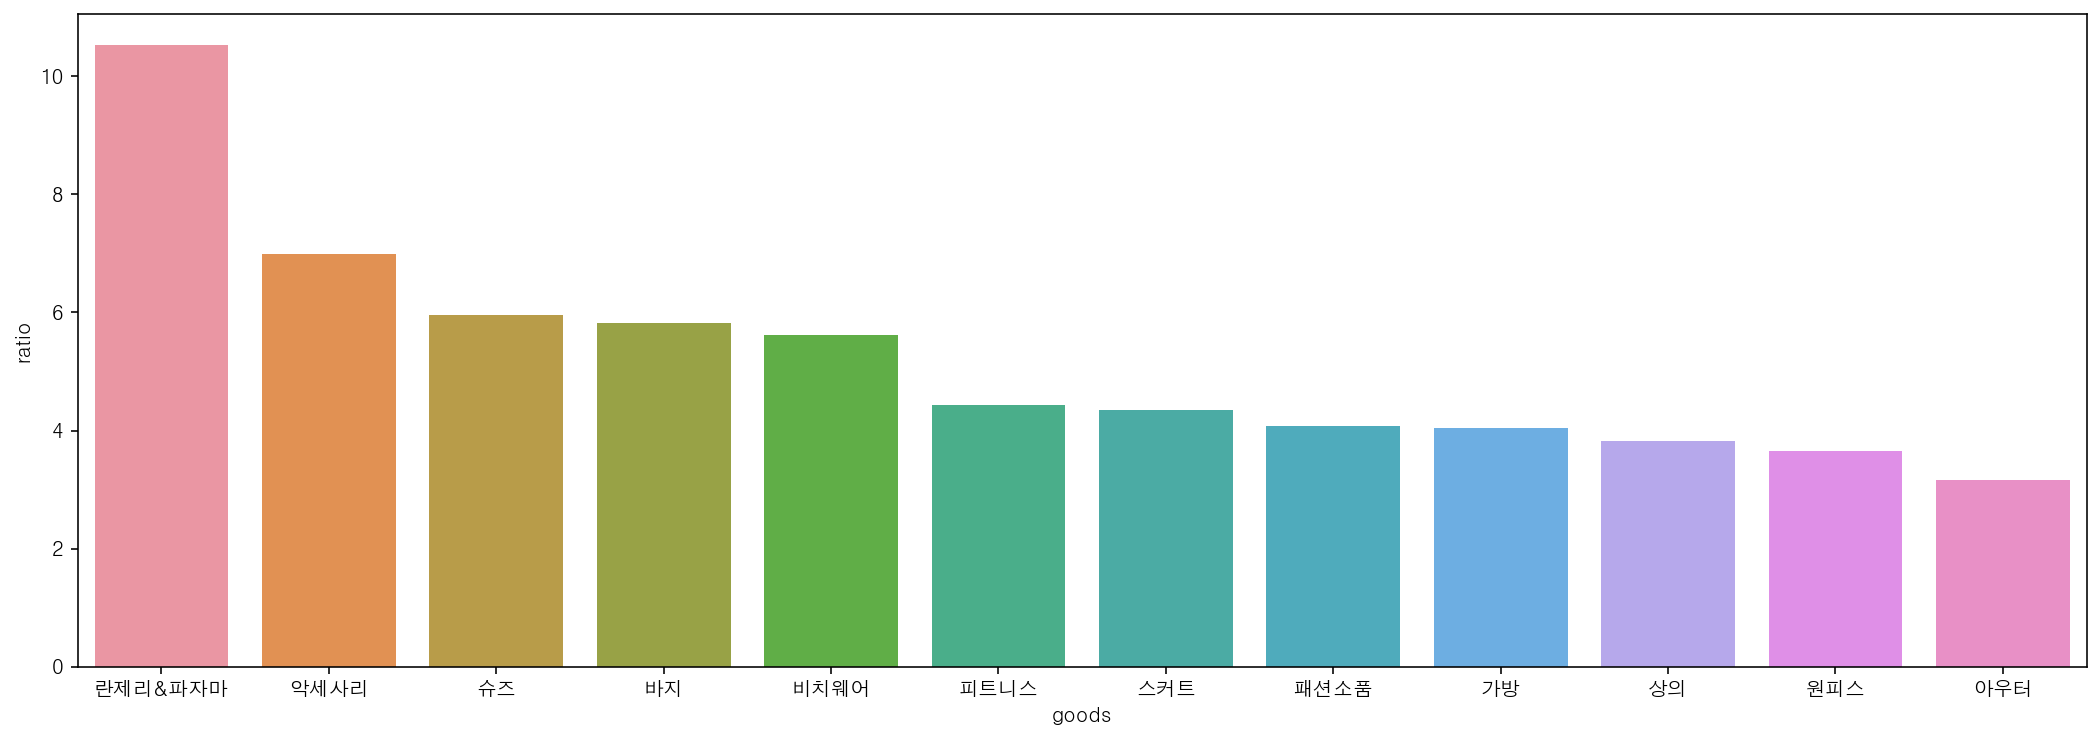

In [9]:
# searching_goods와 order_goods를 goods컬럼을 기준으로 합쳐준 뒤 goods_searching_order_ratio변수에 넣어줍니다.
goods_searching_order_ratio = searching_goods.merge(order_goods, on = "goods")
# goods_searching_order_ratio의 order_goods_counts컬럼을 goods_counts컬럼으로 나누준 뒤 100을 곱하여 새로운 ratio컬럼에 넣어줍니다.
goods_searching_order_ratio["ratio"] = (goods_searching_order_ratio["order_goods_counts"]/goods_searching_order_ratio["goods_counts"])*100
# goods_searching_order_ratio를 sort_values를 이용하여 ratio가 큰값순으로 정렬하여 줍니다.
# 인덱스는 초기화 하고 컬럼으로 나온 index는 삭제하여준 뒤 goods_searching_order_ratio 변수에 다시 넣어줍니다.
goods_searching_order_ratio = goods_searching_order_ratio.sort_values(by = "ratio", ascending = False).reset_index(drop = True)

# 그래프의 크기는 18,6 싸이즈로 합니다.
plt.figure(figsize = (18, 6))
# seaborn의 barplot을 이용하여 goods_searching_order_ratio의 goods(상품)별 ratio(판매율)을 그려줍니다.
sns.barplot(data = goods_searching_order_ratio, x = "goods", y = "ratio")
# goods_searching_order_ratio를 출력하여 그래프와 같이 확인합니다.
goods_searching_order_ratio

,category,category_counts,order_category_counts,ratio
0,란제리&파자마,295,43,14.576271
1,액세서리,433,42,9.699769
2,커플룩,37,3,8.108108
3,비치웨어,324,21,6.481481
4,슈즈,1110,71,6.396396
5,패션소품,84,5,5.952381
6,임부복,17,1,5.882353
7,가방,88,4,4.545455
8,의류,15740,671,4.263024
9,빅사이즈,336,6,1.785714


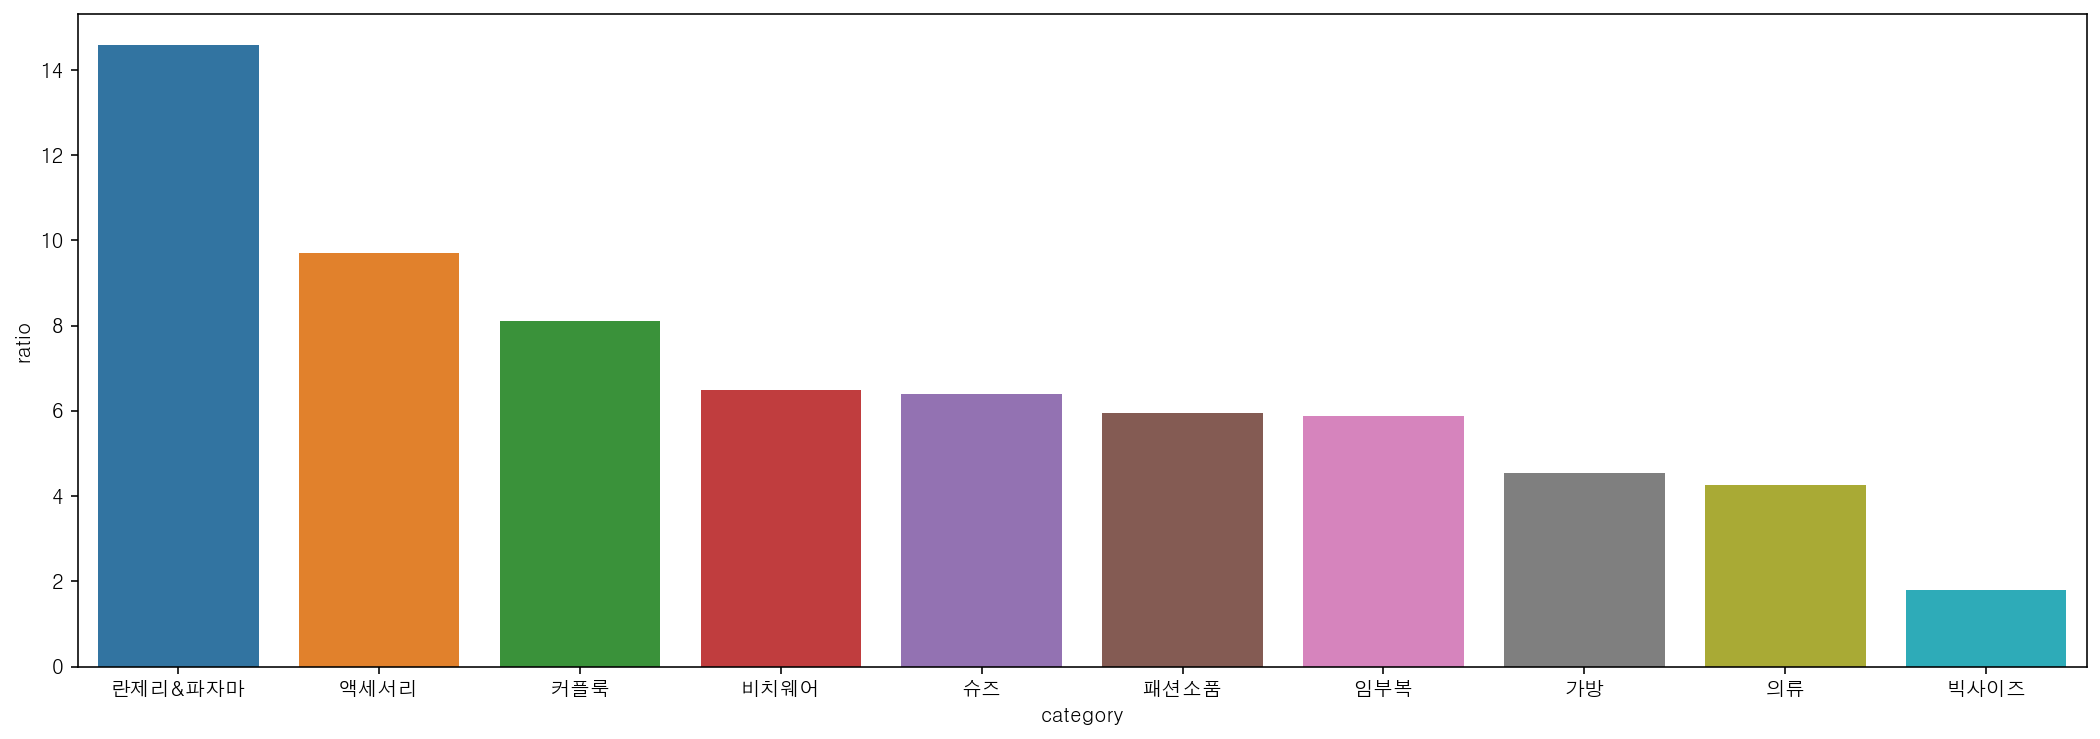

In [10]:
# searching_category와 order_category를 category컬럼을 기준으로 합쳐준 뒤 category_searching_order_ratio변수에 넣어줍니다.
category_searching_order_ratio = searching_category.merge(order_category, on = "category")
# category_searching_order_ratio의 order_category_counts컬럼을 category_counts컬럼으로 나누준 뒤 100을 곱하여 새로운 ratio컬럼에 넣어줍니다.
category_searching_order_ratio["ratio"] = (category_searching_order_ratio["order_category_counts"]/category_searching_order_ratio["category_counts"])*100
# category_searching_order_ratio를 sort_values를 이용하여 ratio가 큰값순으로 정렬하여 줍니다.
# 인덱스는 초기화 하고 컬럼으로 나온 index는 삭제하여준 뒤 category_searching_order_ratio 변수에 다시 넣어줍니다.
category_searching_order_ratio = category_searching_order_ratio.sort_values(by = "ratio", ascending = False).reset_index(drop = True)

# 그래프의 크기는 18,6 싸이즈로 합니다.
plt.figure(figsize = (18, 6))
# seaborn의 barplot을 이용하여 category_searching_order_ratio의 category(카테고리)별 ratio(판매율)을 그려줍니다.
sns.barplot(data = category_searching_order_ratio, x = "category", y = "ratio")
# category_searching_order_ratio를 출력하여 그래프와 같이 확인합니다.
category_searching_order_ratio

### 4) 결론 및 의견
우선 주어진 데이터가 하루동안 쌓인 데이터이므로 성급하게 판단하여서는 안되지만 여기서는 그것을 배재하고 의견을 제시하겠습니다. 먼저 상품 수요량에서 봐야될것은 상의 와 원피스입니다 두 상품은 고객이 많이 찾음에도 불구하고 구매율이 떨어집니다 상의 와 원피스는 워낙 많이 찾는 상품이기에 구매 목적을 가지지 않더라도 단순히 무슨 상품이 있나 찾아볼 수 있다는점을 간과하여서는 안되지만 그럼에도 바지와 같이 3000건이나 찾는 상품의 구매율이 5.8%가 되는것에 비하면 많이 떨어지는것이 사실이므로 상품에 대한 보강이 필요할 것 같습니다. 제가 지그재그에서 근무하는 분석가라면 이러한 내용을 브랜드를 유치하는 MD팀에게 전달하여 상의 와 바지에 강점이 있는 브랜드를 더 MD할 필요가 있다는 의견을 제시하고 싶습니다.

두번째로 카테고리의 수요량대비 구매율 데이터에서 봐야할 점은 빅사이즈 카테고리 입니다. 빅사이즈는 특정 목적을 가지고 찾는 상품으로 전체 상품 카테고리에서도 찾는 수요량만 봤을때 4위에 드는 꽤 수요가 있는 카테고리 입니다 그러나 실제 구매가 1.7%정도로 가장 하위에 있으므로 카테고리의 보강이 필요하다고 생각합니다. 이것또한 해당 내용을 MD팀에게 전달하여 빅사이즈에 강점이 있는 브랜드 유치가 필요하다는 의견을 제시하고 싶습니다.

---

## <center>3. 지그재그기업의 로그데이터를 통한 고객당 구매력 상승 방안 분석
이번에는 서비스에 접속한 유저들의 구매를 이끌어 내는것에서 더 나아가 고객 한명당 구매력을 더 올릴 수 있는 방안을 제시하기 위한 분석을 진행해 보겠습니다. 대부분의 온라인 구매싸이트에서는 구매율이 높은 상품을 더 많이 보이게 하여 더 많은 사람이 더 많이 구매하게끔 유도하는 추천상품 시스템이라는것이 존재합니다. 여기서 저의 생각은 접속하는 기기의 OS에 따라 구매자의 성향이 다를것이며 이것을 분석하여 추천상품의 알고리즘을 구현하는데 필요한 의견을 제시보해겠습니다. 다만 앞선 분석에서와 마찬가지로 하루치의 데이터이기 때문에 통계적 유의성을 검증하지는 못한다는점을 미리 말씀드리며 실제 현업에서는 월/년 기간의 데이터를 분산분석 통해 다른기기별 차이를 검정하여 통계적 타당성을 확보할 수 있을것입니다.

### 1) 필요 데이터 합치기
분석에 필요한 네개의 데이터 order_info/user_info/shop_info/goods_info를 필요한 컬럼을 추려 합쳐줍니다.

In [11]:
# goods_info의 컬럼중 "goods_id","category"컬럼을 가져오고 category의 컬럼명을 goods_name 바꾸준뒤 goods_name변수에 넣어줍니다.
goods_name = goods_info[["goods_id","category"]].rename(columns = {"category": "goods_name"})

# order_info와 goods_name데이터를 goods_id컬럼을 기준으로 합쳐주고 shop_info데이터는 shop_id를 기준으로 합쳐준 뒤
# order_goods_category변수에 넣어줍니다.
order_goods_category_user = (order_info
                             .merge(goods_name, on = "goods_id")
                             .merge(shop_info, on = "shop_id")
                             .merge(user_info, on = "user_id")
                             .rename(columns = {"name" : "shop_name", "age_x" : "age_group", "age_y" : "age"})
                            )
# 상위 5개 값을 확인합니다.
order_goods_category_user.head()

,timestamp,user_id,goods_id,shop_id,price,goods_name,shop_name,category,age_group,style,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,원피스,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,iOS,39
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,원피스,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,And,32
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,원피스,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,And,37
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,상의,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,iOS,34
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,상의,Rachel,의류,10대/20대 초반,러블리/심플베이직,And,17


### 2) 고객데이터를 iOS와 Android로 나눠 구분한 뒤 OS별 성향차이 파악하기
위에서 합쳐진 order_goods_category_user에서 OS컬럼의 값인 iOS 와 And를 기준으로 고객을 나눈 뒤 스타일/연령/상품/샵 별 차이를 시각화 해보겠습니다.

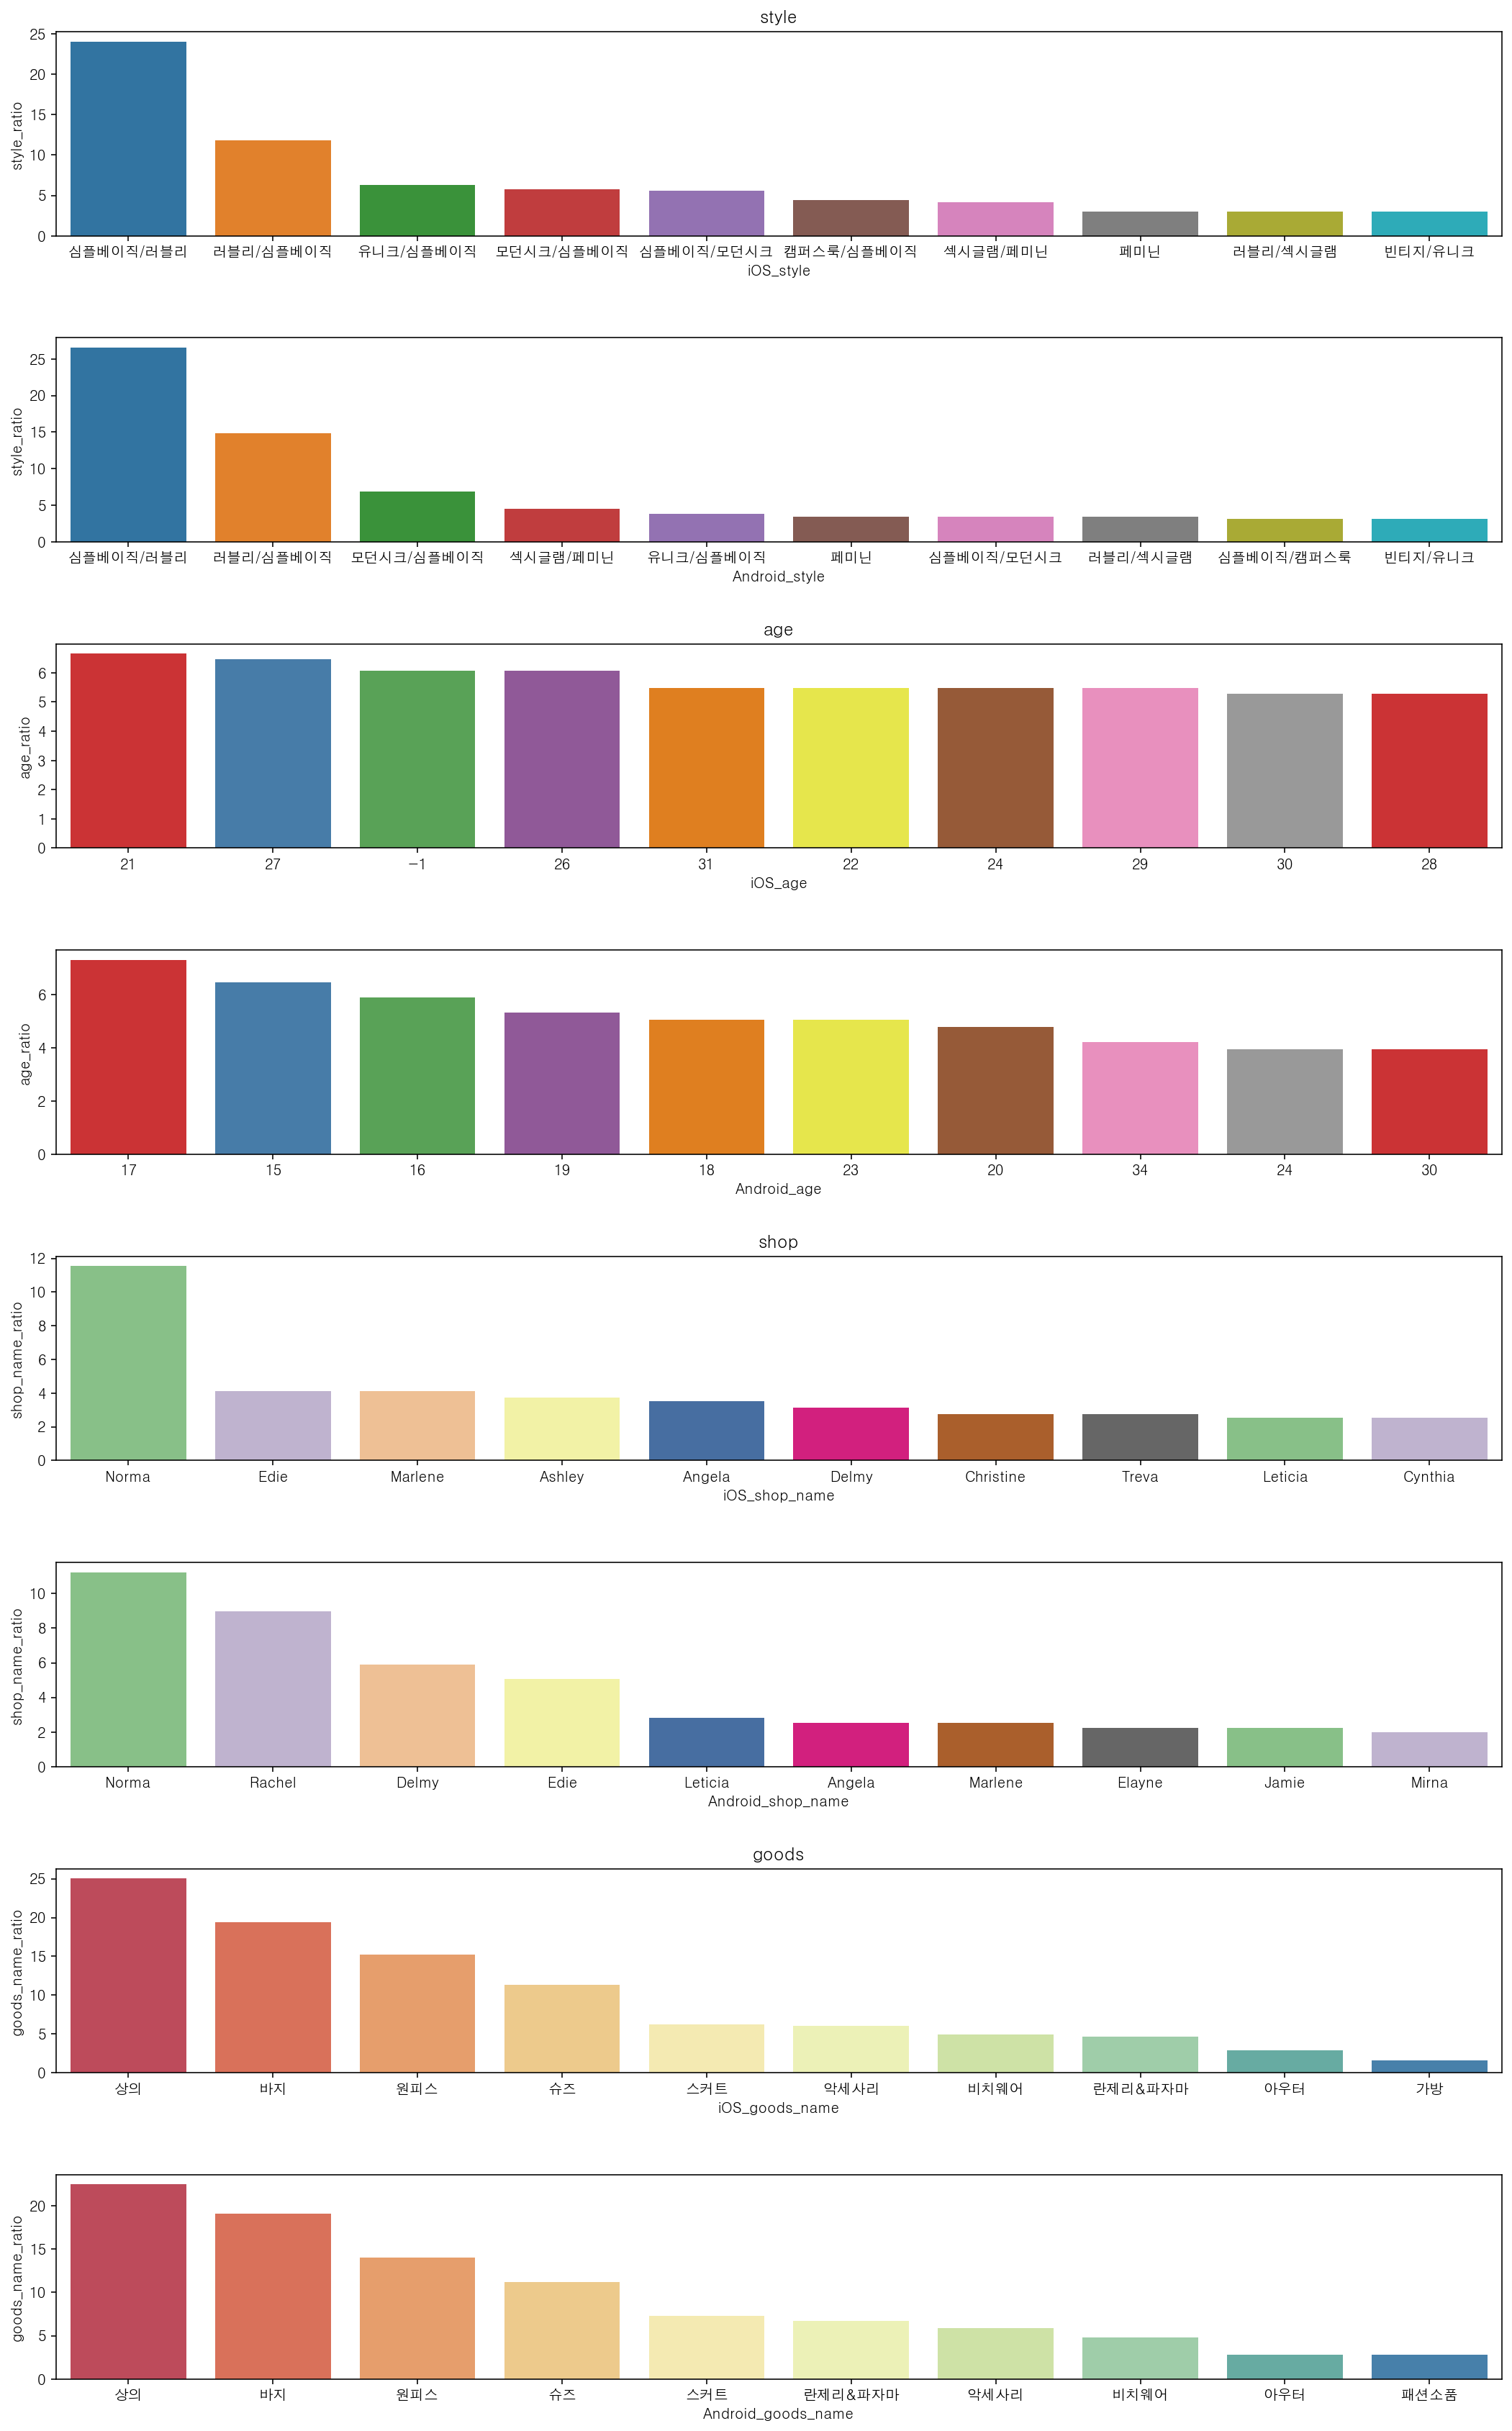

In [34]:
# order_goods_category_user의 OS컬럼중 iOS사용자데이터만 iOS_user변수에 넣어줍니다. 
iOS_user = order_goods_category_user[order_goods_category_user["os"] == "iOS"]
# order_goods_category_user의 OS컬럼중 Android사용자데이터만 Android_user변수에 넣어줍니다. 
Android_user = order_goods_category_user[order_goods_category_user["os"] == "And"]

# iOS_user의 style컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 iOS_style로 style컬럼은 style_count로
# 컬럼명을 변경하여 iOS_style변수에 넣어줍니다.
iOS_style = (iOS_user["style"]
             .value_counts()
             .reset_index()
             .rename(columns = {"index" : "iOS_style", "style" : "style_count"})
            )
# iOS_style의 style_count컬럼을 style_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 style_ratio컬럼에 넣어줍니다.
iOS_style["style_ratio"] = (iOS_style["style_count"]/(iOS_style["style_count"].sum()))*100
# iOS_style의 상위 10개값만 iOS_style_top10변수에 넣어줍니다.
iOS_style_top10 = iOS_style.head(10)

# Android_user의 style컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 Android_style로 style컬럼은 Android_count로
# 컬럼명을 변경하여 Android_style변수에 넣어줍니다.
Android_style = (Android_user["style"]
                 .value_counts()
                 .reset_index()
                 .rename(columns = {"index" : "Android_style", "style" : "style_count"})
                )
# Android_style의 style_count컬럼을 style_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 style_ratio컬럼에 넣어줍니다.
Android_style["style_ratio"] = (Android_style["style_count"]/(Android_style["style_count"].sum()))*100
# Android_style의 상위 10개값만 Android_style_top10변수에 넣어줍니다.
Android_style_top10 = Android_style.head(10)

# iOS_user의 age컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 iOS_age로 age컬럼은 age_count로
# 컬럼명을 변경하여 iOS_age변수에 넣어줍니다.
iOS_age = (iOS_user["age"]
             .value_counts()
             .reset_index()
             .rename(columns = {"index" : "iOS_age", "age" : "age_count"})
            )
# iOS_age의 age_count컬럼을 age_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 age_ratio컬럼에 넣어줍니다.
iOS_age["age_ratio"] = (iOS_age["age_count"]/(iOS_age["age_count"].sum()))*100
# iOS_age의 상위 10개값만 iOS_age_top10변수에 넣어줍니다.
iOS_age_top10 = iOS_age.head(10)

# Android_user의 age컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 Android_age로 age컬럼은 age_count로
# 컬럼명을 변경하여 Android_age변수에 넣어줍니다.
Android_age = (Android_user["age"]
                 .value_counts()
                 .reset_index()
                 .rename(columns = {"index" : "Android_age", "age" : "age_count"})
                )
# Android_age의 age_count컬럼을 age_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 age_ratio컬럼에 넣어줍니다.
Android_age["age_ratio"] = (Android_age["age_count"]/(Android_age["age_count"].sum()))*100
# Android_age의 상위 10개값만 Android_age_top10변수에 넣어줍니다.
Android_age_top10 = Android_age.head(10)

# iOS_user의 shop_name컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 iOS_shop_name로 shop_name컬럼은 
# shop_name_count로 컬럼명을 변경하여 iOS_shop변수에 넣어줍니다.
iOS_shop = (iOS_user["shop_name"]
             .value_counts()
             .reset_index()
             .rename(columns = {"index" : "iOS_shop_name", "shop_name" : "shop_name_count"})
            )
# iOS_shop의 shop_name_count컬럼을 shop_name_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 
# shop_name_ratio컬럼에 넣어줍니다.
iOS_shop["shop_name_ratio"] = (iOS_shop["shop_name_count"]/(iOS_shop["shop_name_count"].sum()))*100
# iOS_shop의 상위 10개값만 iOS_shop_top10변수에 넣어줍니다.
iOS_shop_top10 = iOS_shop.head(10)

# Android_user의 shop_name컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 Android_shop_name로 
# shop_name컬럼은 shop_name_count로 컬럼명을 변경하여 Android_shop변수에 넣어줍니다.
Android_shop = (Android_user["shop_name"]
                 .value_counts()
                 .reset_index()
                 .rename(columns = {"index" : "Android_shop_name", "shop_name" : "shop_name_count"})
                )
# Android_shop의 shop_name_count컬럼을 shop_name_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 
# shop_name_ratio컬럼에 넣어줍니다.
Android_shop["shop_name_ratio"] = (Android_shop["shop_name_count"]/(Android_shop["shop_name_count"].sum()))*100
# Android_shop의 상위 10개값만 Android_shop_top10변수에 넣어줍니다.
Android_shop_top10 = Android_shop.head(10)

# iOS_user의 goods_name컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 iOS_goods_name로 
# goods_name컬럼은 goods_name_count로 컬럼명을 변경하여 iOS_goods변수에 넣어줍니다.
iOS_goods = (iOS_user["goods_name"]
             .value_counts()
             .reset_index()
             .rename(columns = {"index" : "iOS_goods_name", "goods_name" : "goods_name_count"})
            )
# iOS_goods의 goods_name_count컬럼을 goods_name_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 
# goods_name_ratio컬럼에 넣어줍니다.
iOS_goods["goods_name_ratio"] = (iOS_goods["goods_name_count"]/(iOS_goods["goods_name_count"].sum()))*100
# iOS_goods의 상위 10개값만 iOS_goods_top10변수에 넣어줍니다.
iOS_goods_top10 = iOS_goods.head(10)

# Android_user의 goods_name컬럼 데이터를 종류별 수량을 뽑아 인덱스를 초기화 하고 index컬럼은 Android_goods_name로 
# goods_name컬럼은 goods_name_count로 컬럼명을 변경하여 Android_goods변수에 넣어줍니다.
Android_goods = (Android_user["goods_name"]
                 .value_counts()
                 .reset_index()
                 .rename(columns = {"index" : "Android_goods_name", "goods_name" : "goods_name_count"})
                )
# Android_goods의 goods_name_count컬럼을 goods_name_count전체 합계로 나눠준 뒤 100을 곱하여 비율을 계산한 값을 
# goods_name_ratio컬럼에 넣어줍니다.
Android_goods["goods_name_ratio"] = (Android_goods["goods_name_count"]/(Android_goods["goods_name_count"].sum()))*100
# Android_goods의 상위 10개값만 Android_goods_top10변수에 넣어줍니다.
Android_goods_top10 = Android_goods.head(10)

# subplots을 이용하여 8행1열의 행태로 8개의 그래프를 그릴수 있는 figure를 생성하여줍니다.
figure, (ax1 , ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows = 8, ncols = 1)
# 그래프의 크기는 18,30 으로 설정합니다.
figure.set_size_inches(18, 30)
# 그래프의 간격을 설정합니다.
plt.subplots_adjust(hspace = 0.5)

# seaborn의 barplot를 이용하여 iOS_style_top10의 데이터를 그려줍니다. x는 iOS_style컬럼값을 
# y는 style_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 1행에 위치시킵니다.
sns.barplot(data = iOS_style_top10, 
            x = "iOS_style", 
            y = "style_ratio",
            ax = ax1).set(title = "style")
# seaborn의 barplot를 이용하여 Android_style_top10의 데이터를 그려줍니다. x는 Android_style컬럼값을 
# y는 Android_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 2행에 위치시킵니다.
sns.barplot(data = Android_style_top10, 
            x = "Android_style", 
            y = "style_ratio", 
            ax = ax2)

# seaborn의 barplot를 이용하여 iOS_age_top10의 데이터를 그려줍니다. x는 iOS_age컬럼값을 
# y는 age_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 3행에 위치시킵니다.
sns.barplot(data = iOS_age_top10, 
            x = "iOS_age", 
            y = "age_ratio", 
            order = iOS_age_top10["iOS_age"],
            palette = "Set1",
            ax = ax3).set(title = "age")
# seaborn의 barplot를 이용하여 Android_age_top10의 데이터를 그려줍니다. x는 Android_age컬럼값을 
# y는 age_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 4행에 위치시킵니다.
sns.barplot(data = Android_age_top10, 
            x = "Android_age", 
            y = "age_ratio", 
            order = Android_age_top10["Android_age"], 
            palette = "Set1",
            ax = ax4)

# seaborn의 barplot를 이용하여 iOS_shop_top10의 데이터를 그려줍니다. x는 iOS_shop_name컬럼값을 
# y는 shop_name_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 5행에 위치시킵니다.
sns.barplot(data = iOS_shop_top10, 
            x = "iOS_shop_name", 
            y = "shop_name_ratio",
            palette = "Accent",
            ax = ax5).set(title = "shop")
# seaborn의 barplot를 이용하여 Android_shop_top10의 데이터를 그려줍니다. x는 Android_shop_name컬럼값을 
# y는 shop_name_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 6행에 위치시킵니다.
sns.barplot(data = Android_shop_top10, 
            x = "Android_shop_name", 
            y = "shop_name_ratio",
            palette = "Accent",
            ax = ax6)

# seaborn의 barplot를 이용하여 iOS_goods_top10의 데이터를 그려줍니다. x는 iOS_goods_name컬럼값을 
# y는 goods_name_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 7행에 위치시킵니다.
sns.barplot(data = iOS_goods_top10, 
            x = "iOS_goods_name", 
            y = "goods_name_ratio",
            palette = "Spectral",
            ax = ax7).set(title = "goods")
# seaborn의 barplot를 이용하여 Android_goods_top10의 데이터를 그려줍니다. x는 Android_goods_name컬럼값을 
# y는 goods_name_ratio값을 지정하여주고 ax옵션을 이용하여 8개의 그래프중 8행에 위치시킵니다.
sns.barplot(data = Android_goods_top10, 
            x = "Android_goods_name", 
            y = "goods_name_ratio",
            palette = "Spectral",
            ax = ax8)

### 3) 결론 및 의견
고객데이터를 OS별(iOS/Andoird)로 나눠보고 그것에 대한 성향의 차이가 있는지 옷의스타일/연령대/쇼핑몰/상품 의 종류별로 나누어시각화를 해보았습니다.   각 데이터별로 가장많은 비율을 차지하는 값에 대해서는 다른점이 없어보이나 대부분의 데이터에서 중간쯤의 순위를 점유하고 있는 데이터의 성향이 차이가 난다는것을 알 수 있습니다. 비록 하루치 데이터의 차이 이므로 큰차이가 아니라고 판단할 수 있으나 실제 현업에서는 누적된 데이터가 있으므로 그것을 감안한다면 충분히 의미 있는 차이가 날 수 있다고 생각합니다. 이것으로 결국 고객에게 보여지는 추천상품의 알고리즘을 구현할때 이러한 성향차이도 반영된다면 좀더 구매력을 높일 수 있는 방법이라고 생각합니다.